# Защита персональных данных клиентов

Задача: защитить данные клиентов страховой компании «Хоть потоп». Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию, а также обосновать корректность его работы.

При разработке метода защиты данных необходимо учитвать, что при преобразовании качество моделей машинного обучения не должно ухудшаться. Подбирать наилучшую модель не требуется.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Считывание-и-анализ-файла" data-toc-modified-id="Считывание-и-анализ-файла-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Считывание и анализ файла</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Класс-LinearRegression" data-toc-modified-id="Класс-LinearRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Класс LinearRegression</a></span></li><li><span><a href="#Класс-MatrixEncrypt" data-toc-modified-id="Класс-MatrixEncrypt-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Класс MatrixEncrypt</a></span></li><li><span><a href="#Разделение-данных-на-признаки" data-toc-modified-id="Разделение-данных-на-признаки-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Разделение данных на признаки</a></span></li><li><span><a href="#Создание-модели-на-незашифрованных-признаках" data-toc-modified-id="Создание-модели-на-незашифрованных-признаках-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Создание модели на незашифрованных признаках</a></span></li><li><span><a href="#Шифрование-признаков" data-toc-modified-id="Шифрование-признаков-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Шифрование признаков</a></span></li><li><span><a href="#Создание-модели-на-зашифрованных-признаках" data-toc-modified-id="Создание-модели-на-зашифрованных-признаках-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Создание модели на зашифрованных признаках</a></span></li><li><span><a href="#Расшифрование-признаков" data-toc-modified-id="Расшифрование-признаков-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Расшифрование признаков</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Загрузка данных

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

### Считывание и анализ файла

Считываем файл и выводим на экран первые 5 строк.

In [2]:
try:
    df = pd.read_csv('C:\\Users\\maria\\OneDrive\\Masha\\data_science\\projects\\datasets\\insurance.csv')
except FileNotFoundError:
    df = pd.read_csv('/datasets/insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Выводим сведения о данных.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Проверяем наличие нулевых значений.

In [4]:
df.isna().any()

Пол                  False
Возраст              False
Зарплата             False
Члены семьи          False
Страховые выплаты    False
dtype: bool

Исследуем распределение данных.

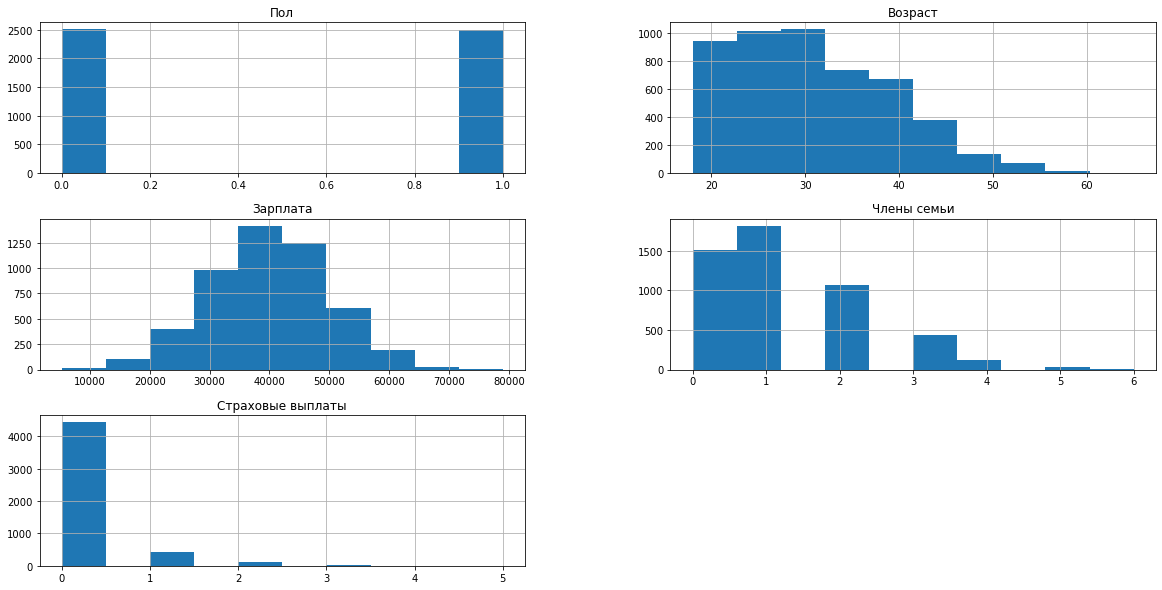

In [5]:
df.hist(figsize=(20, 10));

Проверяем наличие дубликатов и выводим 5 строк-дубликатов.

In [6]:
print('Число дубликатов:', df.duplicated().sum())
df[df.duplicated()].head()

Число дубликатов: 153


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0


### Вывод

Исходный файл содержит 5000 строк и 5 столбцов. Типы данных заданы правильно. Строки не содержат нулевых значений. Имеется несколько дубликатов, что скорее всего вызвано совпадением данных, поэтому не будем удалять их. Изучив распределение данных в столбцах, можно сказать, что в таблице представлены адекватные данные, выбросы отсутствуют. Поэтому предобработка данных не требуется.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос.** Изменится ли качество линейной регрессии, если признаки умножить на обратимую матрицу?

**Ответ.** Не изменится.

**Обоснование.**

Домножим исходную матрицу $X$ на обратимую матрицу $P$:  
$X_1 = XP$  
Вычислим новые предсказание и вектор весов:  
$a_1 = X_1w_1$  
$w_1 = (X_1^T X_1)^{-1} X_1^T y$  
Подставим вектор весов $w_1$ в выражение для предсказания $a_1$:  
$a_1 = X_1 (X_1^T X_1)^{-1} X_1^T$  
Заменим $X_1$ на $XP$:  
$a_1 = XP ((XP)^T XP)^{-1} (XP)^T y$  
Поскольку транспонирование произведения матриц равно произведению транспонированных матриц, взятых в обратном порядке, получаем:  
$a_1 = XP (P^T X^T X P)^{-1} P^T X^T y$  
Воспользуемся тем, что матрица, обратная произведению матриц, равна произведению матриц, обратных матрицам-сомножителям, взятому в обратном порядке:  
$a_1 = XP P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y$  
Поскольку $P P^{-1} = E$,  $(P^T)^{-1} P^T = E$, получаем  
$a_1 = X (X^T X)^{-1} X^T y$  
$a_1 = X w$  
$a_1 = a$

Таким образом, мы получили, что предсказания до и после преобразования совпадают.

## Алгоритм преобразования

**Задача**

Преобразовать данные так, чтобы:  
1) по ним можно было восстановить персональную информацию,  
2) качество модели машинного обучения не ухудшилось.

**Алгоритм**

1) Создаем случайную матрицу $P$ размера $nxn$, где $n$ — число обучающих признаков.  
2) Проверяем, что матрица $P$ имеет обратную.  
3) Умножаем обучающие признаки $X$ на матрицу $P$. Получаем зашифрованную матрицу признаков $X_{enc}$.  
4) Обучаем модель на зашифрованных признаках.  
5) Для дешифрования данных их необходимо умножить на матрицу $P^{-1}$, обтатную к $P$.

**Обоснование**

При умножении исходной матрицы признаков $X$ на обратимую матрицу $P$ предсказание не меняется, как было показано в пункте 2. Следовательно, не изменится и качество модели машинного обучения.

## Проверка алгоритма

### Класс LinearRegression

In [7]:
class LinearRegression:
    # Метод fit принимает на вход обучающие признаки и целевой признак,
    # вычисляет атрибуты w и w0.
    
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    # Метод predict принимает на вход признаки и вычисляет предсказание.
    
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

### Класс MatrixEncrypt

In [8]:
class MatrixEncrypt:
    # Метод зашифровывает матрицу X путем умножения на обратимую матрицу
    
    def encrypt(self, X):
        X_enc = X @ self.K_enc
        return X_enc 
    
    # Метод расшифровывает матрицу X_enc путем умножения на обратную матрицу
    
    def decrypt(self, X_enc):
        X = X_enc @ self.K_dec
        return X
    
    # Метод определяет атрибуты: ключи шифрования и дешифрования
    
    def create_keys(self, n):
        num_retries = 5
        
        # При создании матрицы учитывается вероятность создания необратимой матрицы.
        # Для этого используется цикл в 5 попыток создания обратимой матрицы.
        
        for attempt_num in range(num_retries):
            try:
                K_enc = np.random.normal(size=(n,n)) # Создание квадратной матрицы - ключа шифрования
                K_dec = np.linalg.inv(K_enc) # Получение обратной матрицы - ключа дешифрования
                self.K_enc = K_enc
                self.K_dec = K_dec
                return True
            except np.linalg.LinAlgError as error:
                if (attempt_num < num_retries - 1):
                    pass
                else:
                    raise error

### Разделение данных на признаки

In [9]:
# Разделяем данные на обучающие и целевой признак

features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']
display(features.head())
display(target.head())

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


0    0
1    1
2    0
3    0
4    0
Name: Страховые выплаты, dtype: int64

### Создание модели на незашифрованных признаках

In [10]:
# Создаем модель линейной регрессии, обучаем ее на признаках
# и считаем качество модели

model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
r2 = r2_score(target, predictions)
print('R2 для модели с незашифрованными данными:', r2)

R2 для модели с незашифрованными данными: 0.4249455028666801


### Шифрование признаков

In [11]:
# Шифрование признаков

algorythm = MatrixEncrypt()
if algorythm.create_keys(features.shape[1]):
    features_enc = algorythm.encrypt(features)
    print(features_enc)

                 0             1             2             3
0    -41788.214306  48136.103724  11137.405364 -46903.602972
1    -31999.996288  36882.716860   8518.571877 -35969.658135
2    -17680.197348  20384.453788   4702.816856 -19884.865591
3    -35146.748678  40462.193198   9381.011116 -39404.591134
4    -21982.569728  25333.106740   5852.215912 -24694.779742
...            ...           ...           ...           ...
4995 -30079.474526  34643.647035   8021.092255 -33759.493005
4996 -44156.496151  50848.980971  11777.272172 -49529.290023
4997 -28569.724954  32894.393908   7623.858307 -32041.983686
4998 -27556.521482  31730.912421   7351.794085 -30917.113299
4999 -34211.577121  39399.700515   9122.520160 -38380.161007

[5000 rows x 4 columns]


### Создание модели на зашифрованных признаках

In [12]:
# Создаем модель для обучения на зашифрованных признаках

model_enc = LinearRegression()
model_enc.fit(features_enc, target)
predictions_enc = model_enc.predict(features_enc)
r2_enc = r2_score(target, predictions_enc)
print('R2 для модели с зашифрованными данными:', r2_enc)

R2 для модели с зашифрованными данными: 0.42494550286666877


In [13]:
# Сравним метрики качества обеих моделей:

print('R2 для модели с незашифрованными данными:', r2)
print('R2 для модели с зашифрованными данными:  ', r2_enc)

R2 для модели с незашифрованными данными: 0.4249455028666801
R2 для модели с зашифрованными данными:   0.42494550286666877


**Вывод:** значения метрик качества R2 практически совпадают для обеих моделей.

### Расшифрование признаков

In [14]:
# Проверим, что исходные данные можно восстановить из зашифрованных
# Умножим зашифрованные данные на ключ дешифрования и сравним с исходными

features_decr = algorythm.decrypt(features_enc)
result = features_decr - features.values
print(np.round(result).astype(int))

      0  1  2  3
0     0  0  0  0
1     0  0  0  0
2     0  0  0  0
3     0  0  0  0
4     0  0  0  0
...  .. .. .. ..
4995  0  0  0  0
4996  0  0  0  0
4997  0  0  0  0
4998  0  0  0  0
4999  0  0  0  0

[5000 rows x 4 columns]


**Вывод**

Разность дешифрованной и исходной матриц равна нулевой матрице, то есть в результате расшифровании получились исходные значения.

## Выводы

Цель проекта заключается в создании алгоритма преобразования данных, с помощью которого можно защитить персональные данные клиентов страховой компании и при этом не ухудшить качество модели машинного обучения.

Мы получили исходные данные в виде файла, содержащего 5000 строк и 5 столбцов. Проанализировав файл, мы установили, что типы данных заданы правильно, строки не содержат нулевых значений, несколько дубликатов вызвано простым совпадением данных. Распределение данных в столбцах также адекватное, без выбросов. Из этого мы сделали вывод, что преобработка данных не требуется.

Затем мы доказали, что при умножении признаков на обратимую матрицу качество линейной регрессии не меняется.

Основываясь на этом утверждении, мы предложили алгоритм защиты данных клиента путем домножения матрицы обучающих признаком на обратимую матрицу.

Далее мы проверили этот алгоритм:  
- Разделили данные на обучающие и целевой признаки
- Создали класс *LinearRegression* с методами *fit* для вычисления вектора весов линейной регрессии и *predict* для вычисления предсказания
- Создали класс *MatrixEncrypt* с методами *encrypt* (шифрование), *decrypt* (расшифрование) и *create_keys* (создание ключей шифрования и расшифрования)
- Создали модель линейной регрессии, обучили ее на незашифрованных данных и рассчитали метрику качества R2
- Создали объект класса *MatrixEncrypt*, ключи шифрования и зашифровали исходные обучающие признаки
- Создали новую модель линейной регрессии, обучили ее на зашифрованных данных, рассчитали метрику качества R2 и получили значение, аналогичное первой модели
- Расшифровали зашифрованные признаки и получили исходные данные

В результате мы делаем вывод, что предложенный алгоритм можно использовать для защиты данных клиентов.